<a href="https://colab.research.google.com/github/mackenly2/224239_mjc_professor/blob/main/homework_2_debetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Home work #2


Linear Regression -> MSE: 2900.19, R²: 0.4526
Ridge (alpha=0.01) -> MSE: 2900.08, R²: 0.4526
Ridge (alpha=0.1) -> MSE: 2899.05, R²: 0.4528
Ridge (alpha=1) -> MSE: 2892.01, R²: 0.4541
Ridge (alpha=10) -> MSE: 2875.78, R²: 0.4572
Ridge (alpha=100) -> MSE: 2858.22, R²: 0.4605
Lasso (alpha=0.01) -> MSE: 2898.37, R²: 0.4529
Lasso (alpha=0.1) -> MSE: 2884.62, R²: 0.4555
Lasso (alpha=1) -> MSE: 2824.57, R²: 0.4669
Lasso (alpha=10) -> MSE: 2933.83, R²: 0.4463
Lasso (alpha=100) -> MSE: 5361.53, R²: -0.0120

📋 Summary Table
             Model  R2 Score          MSE
8      Lasso (α=1)  0.466877  2824.568094
5    Ridge (α=100)  0.460524  2858.224287
4     Ridge (α=10)  0.457211  2875.778718
7    Lasso (α=0.1)  0.455541  2884.624289
3      Ridge (α=1)  0.454147  2892.014566
6   Lasso (α=0.01)  0.452947  2898.368019
2    Ridge (α=0.1)  0.452818  2899.054556
1   Ridge (α=0.01)  0.452625  2900.075130
0           Linear  0.452603  2900.193628
9     Lasso (α=10)  0.446253  2933.834730
10   Lasso (α=100)

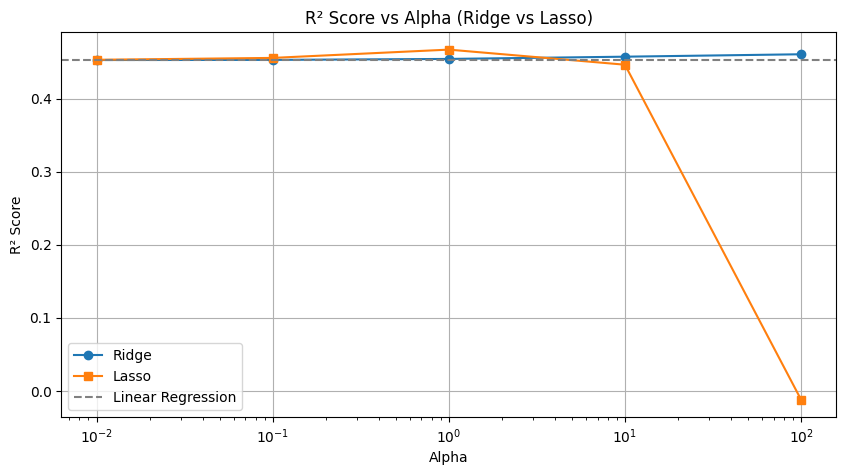

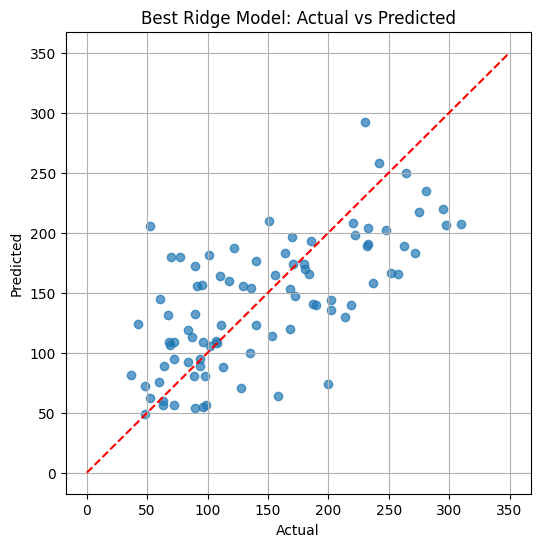

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# 1. 데이터 불러오기
data = load_diabetes()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Linear Regression
lin_model = LinearRegression()
lin_model.fit(X_train_scaled, y_train)
y_pred_lin = lin_model.predict(X_test_scaled)
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print(f"Linear Regression -> MSE: {mse_lin:.2f}, R²: {r2_lin:.4f}")

# 4. Ridge Regression
ridge_alphas = [0.01, 0.1, 1, 10, 100]
ridge_results = []

for alpha in ridge_alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    ridge_results.append((alpha, mse, r2))
    print(f"Ridge (alpha={alpha}) -> MSE: {mse:.2f}, R²: {r2:.4f}")

# 5. Lasso Regression
lasso_alphas = [0.01, 0.1, 1, 10, 100]
lasso_results = []

for alpha in lasso_alphas:
    model = Lasso(alpha=alpha, max_iter=10000)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    lasso_results.append((alpha, mse, r2))
    print(f"Lasso (alpha={alpha}) -> MSE: {mse:.2f}, R²: {r2:.4f}")

# 6. 정리된 결과 테이블
print("\n📋 Summary Table")
summary_df = pd.DataFrame({
    "Model": ["Linear"] + [f"Ridge (α={a})" for a, _, _ in ridge_results] + [f"Lasso (α={a})" for a, _, _ in lasso_results],
    "R2 Score": [r2_lin] + [r2 for _, _, r2 in ridge_results] + [r2 for _, _, r2 in lasso_results],
    "MSE": [mse_lin] + [mse for _, mse, _ in ridge_results] + [mse for _, mse, _ in lasso_results]
})
print(summary_df.sort_values(by="R2 Score", ascending=False))

# 7. 시각화 (R² vs alpha)
plt.figure(figsize=(10, 5))
plt.plot(ridge_alphas, [r2 for _, _, r2 in ridge_results], marker='o', label="Ridge")
plt.plot(lasso_alphas, [r2 for _, _, r2 in lasso_results], marker='s', label="Lasso")
plt.axhline(y=r2_lin, color='gray', linestyle='--', label="Linear Regression")
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("R² Score")
plt.title("R² Score vs Alpha (Ridge vs Lasso)")
plt.legend()
plt.grid(True)
plt.show()

# 8. 최고 모델로 예측 시각화 (예: Ridge α=1)
best_ridge_model = Ridge(alpha=1)
best_ridge_model.fit(X_train_scaled, y_train)
y_best_pred = best_ridge_model.predict(X_test_scaled)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_best_pred, alpha=0.7)
plt.plot([0, 350], [0, 350], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Best Ridge Model: Actual vs Predicted")
plt.grid(True)
plt.show()
